# Домашнее задание 1 (NumPy, Pandas, Matplotlib)

## Общая информация
**Дата выдачи**: 31.01.2018

**Срок сдачи**: 23:59 13.02.2018

**О задании**

Домашнее задание №1 ориентировано на более тесное знакомство с модулями NumPy, Pandas и Matplotlib путём решения набора задач. Целью задания является редактирование данного ipython notebook'a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

**Оценивание и штрафы**

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи), оценка за задание выставляется следующим образом:
Оценка за задание = Сумма баллов за решенные задачи/3

Таким образом, максимально допустимая оценка за задание — 10 баллов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.2 балла в день, но получить отрицательное число баллов нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется **САМОСТОЯТЕЛЬНО**. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

**Формат сдачи**

Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: HW1_Username.ipynb, где Username — Ваша фамилия на латинице. Далее отправьте этот файл на почту курса ( hse.minor.dm+<номер группы>@gmail.com, указав в теме письма "[ИАД-1] Задание N, ФИО")



## Инструкция по установке на Windows:

Для установки всех необходимых библиотек на windows рекомендуется поставить дистрибутив Anaconda. Для этого нужно
просто скачать необходимую версия с официального сайта https://www.continuum.io/downloads (мы рекомендуем ставить
python версии 3.x). После установки дистрибутива необходимо запустить командную строку (для этого можно нажать win+R и набрать команду cmd). Затем, для запуска ipython notebook'а достаточно просто написать ipython notebook в
командной строке, и у вашем браузере откроется стандартная страничка, которую вы уже много раз видели, используя
виртуальную машину.

## Инструкция по установке на Linux/Mac OS:

Под Linux и Mac OS также доступен дистрибутив Anaconda, который можно скачать с https://www.continuum.io/downloads.
Дальше опять же вам нужно открыть терминал и набрать там команду ipython notebook (либо возможно ipython3
notebook).

Если же вам по каким-либо причинам не хочется ставить Anaconda (например, вы не хотите, чтобы у вас появлялась еще
одна версия python и были возможные конфликты путей, или вы просто чувствуете в себе Силу и хотите все поставить
сами), то можно установить все необходимые библиотеки напрямую. Для этого выполните в терминале следующие две
команды:

```bash
sudo apt-get install -y build-essential python3-numpy python3-scipy python3-matplotlib ipython3 
ipython3-notebook python3-pandas python3-sympy python3-nose python3-pip swig

sudo pip3 install cython scikit-image scikit-learn jupyter
```
Для Mac OS в первой команде нужно заменить apt-get на brew (если у вас стоит пакетный менеджер homebrew, если нет,
его нужно предварительно установить). Если вы хотите использовать python версии 2.x, то во всех командах выше
необходимо убрать цифру 3. То есть, например, писать не python3-numpy, а python-numpy, или не pip3 install, а pip
install.
    
Также, можно воспользоваться инструкциями, описанными здесь:
http://www.machinelearning.ru/wiki/images/1/10/MMP_Praktikum_317_2014a_Python.pdf

Установка Python и всех необходимых модулей не является обязательной для сдачи данного задания.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## NumPy

При решении задач запрещено использовать циклы. Обратите внимание на функции и методы np.max, np.min, np.arange, np.hstack, np.roll, np.random.uniform, np.random.rand, np.newaxis.

#### 1. (1 балл) Написать функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$)

    Например, для a = np.array([4, 2, 6, 3]) и b = np.array([4, 3, 6, -3]) ответом является кортеж (4, 6).

In [15]:
def minMaxEqual(a, b):
    mask = a == b
    intersection = a[mask]
    Min = np.amin(intersection)
    Max = np.amax(intersection)
    return((Min, Max))

[ True False  True False]
[4 6]
(4, 6)


#### 2. (2 балла) Дан numpy-вектор v длины n+1, который задает полином степени n. Найти вторую производную этого полинома (Например np.array([3, 0, 7, 1]) соответствует полиному 3+7x^2+x^3)

    Для вектора из примера функция должна будет выдавать np.array([14, 6])

In [20]:
v = np.array([3, 0, 7, 1])

def second_derivative(v):
    v1 = np.array([(v[i] * i ) for i in range(len(v))])
    v1 = np.delete(v1, [0])
    v2 = np.array([(v1[i] * i ) for i in range(len(v1))])
    v2 = np.delete(v2, [0])
    return(v2)

print(second_derivative(v))

[14  6]


3. (1 балл) Дана матрица X и два вектора одинаковой длины i и j. Написать функцию, которая возвращает вектор np.array, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]$. 

In [28]:
def constructArray(X, i, j):
    A = np.array(X[i[k]][j[k]] for k in range(len(i)))
    return(A)

4. (2 балла) Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

    Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [27]:
def prevZeroMax(x):
    def IsZero(i):
        if i !=0 and x[i - 1] == 0:
            return True
        else:
            return False
    mask = np.array([IsZero(i) for i in range(len(x))])
    x1 = x[mask]
    return(max(x1))

5. (2 балла) Напишите функцию, которая принимает параметры lims: ndarray размерности 2, k: float, b: float, n: int, noise_level: float и возвращает выборку из n объектов, сгенерированную по правилу y = kx + b + U[-noise_level; noise_level]. x генерируется равномерно из U[lims[0]; lims[1]] (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [116]:
def gen_data(lims, k, b, n, noise_level):
    x = np.random.uniform(lims[0], lims[1], size=n)
    noise = np.random.uniform(-noise_level, noise_level, size = n)
    y = np.array(list(k*x[i] + b + noise[i] for i in range(n)))
    return((x, y))

6. (2 балла) Напишите функцию, которая вычисляет следующее матричное произведение: $x * x.T + a * I + b$. Здесь x и b — массивы np.array размерности N (одномерные, считаются вектор-столбцом). a — число, I — матрица, состоящая единиц на главной диагонали и нулей в остальных местах (единичная матрица). Сложение вектора b с матрицей x * x.T должно осуществляться по столбцам (вектор b должен прибавиться к каждому столбцу матрицы независимо).

    Например, для x = np.array([1,2,3]), b = np.array([0, -2, 1]), a = 4.5 функция должна выдавать 
    np.array([[5.5, 2.0, 3.0], [0.0, 6.5, 4.0], [4.0, 7.0, 14.5]])

In [181]:
def calc_value(x, b, a):
    x_T = x.transpose()
    I = np.identity(len(x))
    return(np.dot(x, x_T) + a * I + b.transpose())

Pandas


Вам предстоит ответить на ряд вопросов о пассажирах Титаника.

Данные: http://www.machinelearning.ru/wiki/images/3/32/Titanic.zip

Описание датасета: https://www.kaggle.com/c/titanic/data

Обратите внимание на функции и методы pd.read_csv, pd.DataFrame{ .head, .shape, .groupby, .fillna }, pd.Series{ .min, .max, .mean, .shape, .std, .corr }

0. (0.5 балла) Загрузите данные в DataFrame и выведите его. Также напечатайте количество объектов и количество признаков (используйте функцию print):

In [99]:
df = pd.read_csv('train.csv')
print(df)
print(df.shape[1])
print(df.shape[2])

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

IndexError: tuple index out of range

1. (0.5 балла) Какие встречаются типы признаков? Придумайте постановку трех задач, которые можно решать, используя полученные данные: классификации, регрессии и кластеризации.

In [ ]:
Типы признаков:
    бинарные (Survived)
    вещественные (Age, Sibsp, Parch, Fare)
    категориальные (Name, Sex, Ticket, Cabin, Embarked)
    порядковые (Pclass)
Ticket и Cabin категориальные, а не порядковые, т к, номера билетов и кабин выглядят как "буква + номер".
Задача регрессии: предсказание стоимости билета по возрасту.
Задача классификации: классификация "выжил/не выжил", предсказание "выживет/не выживет" на тестовой выборке.
Задача кластеризации: сегментация пассажиров "Титаника"

2. (0.5 балла) Сохраните в переменную firstclass_num количество пассажиров, которые ехали первым классом, и выведите ее с помощью функции print().

In [25]:
classnum = df['Pclass'].value_counts()
firstclass_num = classnum[1]
print(firstclass_num)

216


3. (0.5 балла) Выведите минимальный, максимальный и средний возраст пассажиров.

In [6]:
age = df['Age']
print(min(age))
print(max(age))
print(np.mean(age))

0.42
80.0
29.69911764705882


4. (1 балл) Напечатайте стандартное отклонение цены билетов на Титаник

In [7]:
fare = df['Fare']
print(fare.std())

49.693428597180905


5. (1 балл) Посчитайте коэффициент корреляции ценой на билет и возрастом пассажиров.

In [8]:
fare_and_age = df[['Fare', 'Age']]
print(fare_and_age.corr(method='pearson')['Fare']['Age'])

0.096066691769


6. (2 балла) Создайте DataFrame в котором будет находиться средний возраст выживших пассажиров по каждому классу. Ваш код должен быть масштабируемым (то есть, должен работать при добавлении новых классов к исходному DataFrame'у).

In [16]:
print((df['Age'].groupby(df['Pclass'])).mean())

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


7. (2 балла) Посчитайте какой части пассажиров удалось выжить. Посчитайте отношение количества выживших мужчин к количеству выживших женщинам.

In [39]:
print(df['Survived'].value_counts()[1]/len(df))
print(((df['Survived'].groupby(df['Sex'])).value_counts())['male'][1]/((df['Survived'].groupby(df['Sex'])).value_counts())['female'][1])

0.383838383838
0.467811158798


8. (1 балл) Верно ли, что чаще выживали пассажиры с более дорогими билетами? Кратко опишите в комментариях к коду, какие величины вы хотите посчитать, чтобы ответить на этот вопрос.

In [44]:
fare_and_survival = df[['Fare', 'Survived']]
print(fare_and_survival.corr(method = 'pearson')['Fare']['Survived'])
#Посчитан коэффициент Пирсона между стоимостью билетов и выживанием. Т к, значение < 0,3, гипотеза не подтвердилась.

0.257306522385


9. (1 балл) Замените все NaN в колонке Age на средние значения возраста по всем пассажирам.

In [45]:
age_mean = np.mean(df['Age'])
df['Age'].fillna(age_mean)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

Matplotlib

Обратите внимание, что за отсутствие названий графиков и подписей к осям могут снижаться баллы! Вообще, все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

Обратите внимание на функции и методы plt.plot, plt.scatter, plt.legend, plt.title, plt.xlabel, plt.ylabel, plt.fill_between

1. (3 балла) Используя функцию из задания №5 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_
        

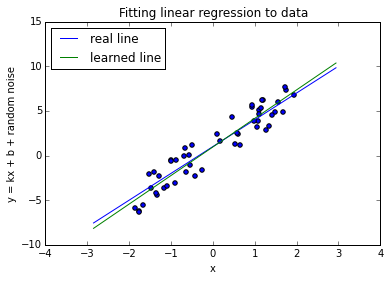

In [4]:
# В итоге ваш график должен получиться примерно таким:

2.48078283991
2.37409039142


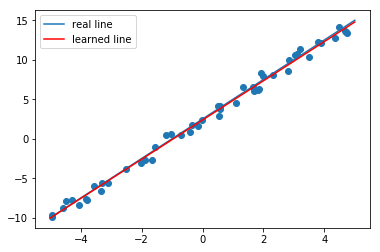

In [180]:
from sklearn.linear_model import LinearRegression as LR

lims = np.array([-5, 5])
k, b, n, noise_level = 2.5, 2.5, 50, 1
data_x, data_y = gen_data(lims, k, b, n, noise_level)
data_x = data_x.reshape(-1, 1)
data_y = data_y.reshape(-1, 1)
regr = LR()
regr.fit(data_x, data_y)
k_learned, b_learned = regr.coef_[0][0], regr.intercept_[0]
print(k_learned)
print(b_learned)
x = np.linspace(-5, 5, dtype = float)
y = np.array(list(k * x + b))
y_learned = np.array(list(k_learned * x + b_learned))
plt.title = 'Fitting linear regression to data'
plt.xlabel = 'x'
plt.ylabel = 'y = kx + b + random noise'
plt.scatter(data_x, data_y)
plt.plot(x, y, label = 'real line')
plt.plot(x, y_learned, color = 'red', label = 'learned line')
plt.legend()
plt.show()

2. (2 балла) Проверьте визуально полученную при выполнении задания №5 по pandas информацию о корреляции между ценой на билет и возрастом пассажира. Для этого предлагается отобразить все данные, откладывая на одной оси возраст пассажира, а на другой цену билета. Каждая точка должна быть визуально оботражена в виде треугольника зеленого цвета, направленного вниз. Сделайте возможность регулировать величину маркера (например, пусть она передается в качестве параметра в функцию, которая рисует график). Обратите внимание на параметры "marker", "s" и "c" функции plt.scatter.

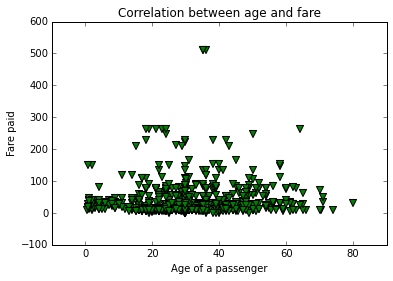

In [5]:
# В итоге ваш график должен получиться примерно таким:

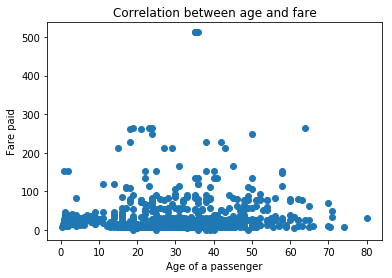

In [61]:
fare = df['Fare']
age = df['Age']
plt.scatter(age, fare)
plt.title('Correlation between age and fare')
plt.xlabel('Age of a passenger')
plt.ylabel('Fare paid')
plt.show()

3. (3 балла) Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

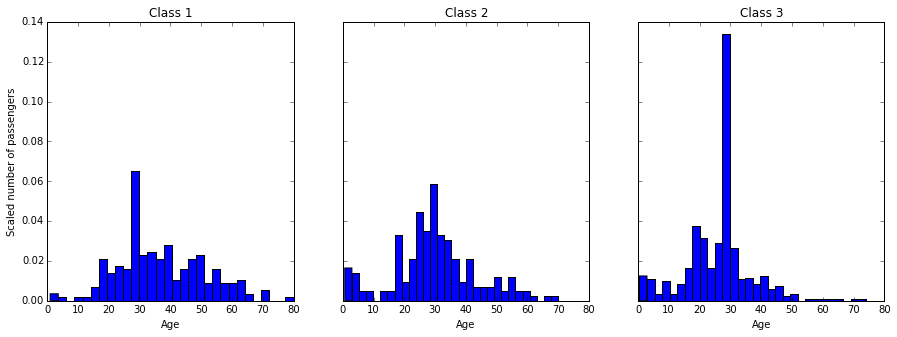

In [6]:
# В итоге ваш график должен получиться примерно таким:

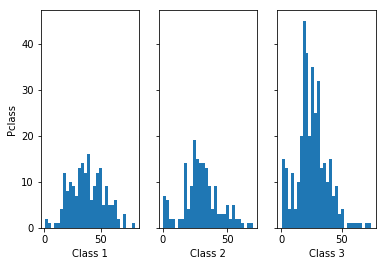

In [164]:
cmp_data = pd.concat([df[df['Pclass'] == 1], 
                      df[df['Pclass'] == 2],
                     df[df['Pclass'] == 3]])
bins = 30
fig, axis = plt.subplots(1, 3, sharey=True, sharex=False)
axis[0].hist(cmp_data[cmp_data['Pclass'] == 1]['Age'].dropna(),
             bins=bins)
axis[0].set_xlabel('Class 1')
axis[0].set_ylabel('Pclass')
axis[1].hist(cmp_data[cmp_data['Pclass'] == 2]['Age'].dropna(),
             bins=bins)
axis[1].set_xlabel('Class 2')
axis[2].hist(cmp_data[cmp_data['Pclass'] == 3]['Age'].dropna(),
             bins=bins)
axis[2].set_xlabel('Class 3')
plt.show()

4. (2 балла) Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].

        def gen_uncertain_data():
            x = np.linspace(0, 30, 100)
            y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
            error = np.random.normal(0.1, 0.02, size=y.shape)
            return x, y, error


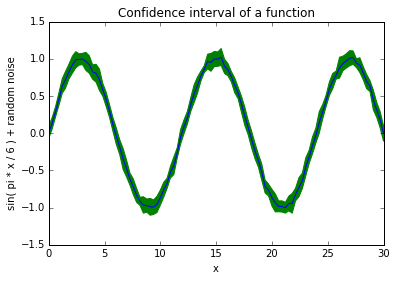

In [7]:
# В итоге ваш график должен получиться примерно таким:

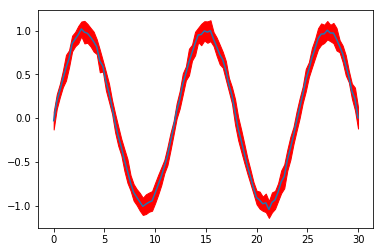

In [182]:
def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

x, y, error = gen_uncertain_data()
plt.plot(x, y)
conf_int_1 = np.array(list(y[i] - error[i] for i in range(len(y))))
conf_int_2 = np.array(list(y[i] + error[i] for i in range(len(y))))
plt.fill_between(x, conf_int_1, conf_int_2, color = 'red')
plt.title = 'Confidence interval of a function'
plt.xlabel = 'x'
plt.ylabel = 'sin(pi * x / 6) + random noise'
plt.show()